# Semi-Supervised Isolation Forest for Anomaly Detection (SSIF)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from ssif import SSIF
from sklearn.model_selection import train_test_split
import seaborn as sns #if you get error, use the line !pip install seaborn


def ignore_warnings():
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    warnings.simplefilter(action='ignore', category=Warning)

ignore_warnings()

## Generating artificial data

Text(0.5, 1.0, 'Artificial dataset')

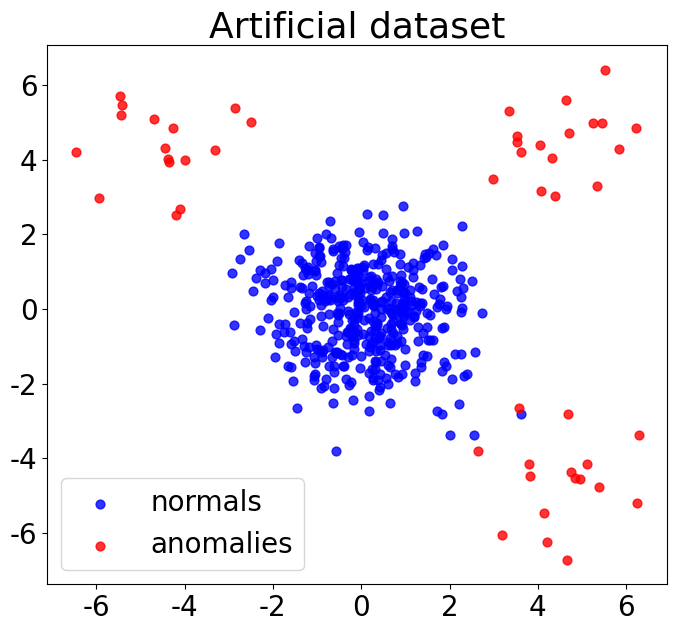

In [2]:
np.random.seed(331)
dataset_size = 500
numerical_col = [r'$X_1$',r'$X_2$']
class_prior = 0.90 #real class prior
contamination = 1-class_prior

a1_ = np.random.randn(2, np.int(dataset_size*(1-class_prior)/3))
a2_ = np.random.randn(2, np.int(dataset_size*(1-class_prior)/3))
a3_ = np.random.randn(2, np.int(dataset_size*contamination) - 2*np.int(dataset_size*(1-class_prior)/3))
num_anom = a1_.shape[1] + a2_.shape[1]+ a3_.shape[1]

n1_ = np.random.randn(2, np.int(dataset_size-num_anom))*1.1
y = -1*np.ones(dataset_size, dtype=np.int)
y[:num_anom] = +1


a1_[0, :] += 4.5
a1_[1, :] -= 4.5
a2_[0, :] -= 4.5
a2_[1, :] += 4.5
a3_[0, :] += 4.5
a3_[1, :] += 4.5

dataset = np.concatenate((a1_, a2_, a3_, n1_), axis=1).T
fig = plt.figure(figsize=(8,7), facecolor='w', edgecolor='k')
plt.scatter(dataset[:,0][y==-1],dataset[:,1][y==-1], 40,"blue", alpha = 0.8, label="normals")
plt.scatter(dataset[:,0][y==1],dataset[:,1][y==1], 40, "red", alpha = 0.8,label="anomalies")
plt.legend(loc=3,fontsize=20)
plt.xticks([-6,-4,-2,0,2,4,6],[-6,-4,-2,0,2,4,6],fontsize=20)
plt.yticks([-6,-4,-2,0,2,4,6],[-6,-4,-2,0,2,4,6],fontsize=20)
plt.title("Artificial dataset",fontsize=26)


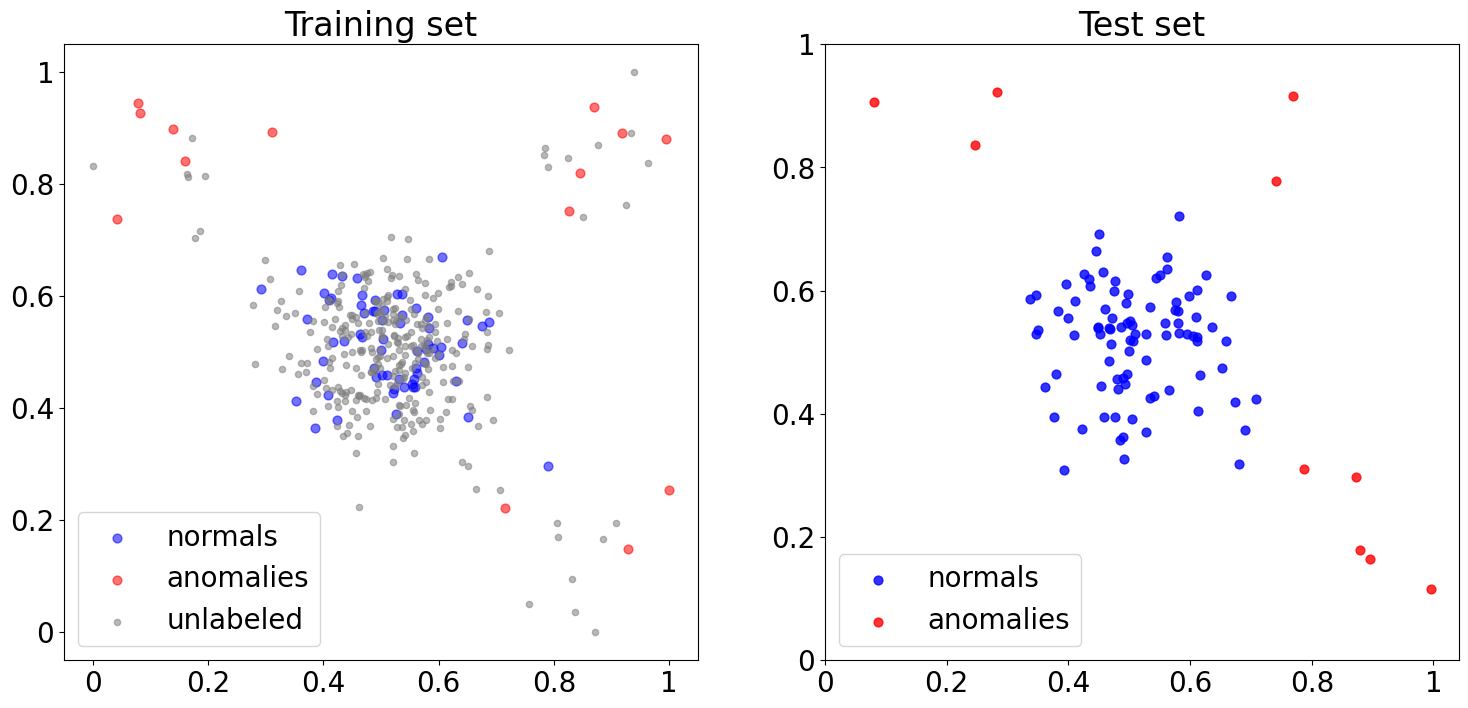

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset,y, test_size=0.2, 
                                            random_state=331,shuffle=True,stratify=y)

c = 0.2 #select the percentage of labeled instances in the training set
idx_unlabeled = np.random.choice(range(len(Y_train)), int((1-c)*len(Y_train)), replace=False)
Y_train[idx_unlabeled] = 0 # 0:unlabeled, 1:anomaly, -1:normal

# normalize training and test set
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Plot training and test sets
fig = plt.figure(figsize=(18, 8), facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1], 40, "blue", label="normals", alpha = 0.55)
plt.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1], 40, "red", label="anomalies", alpha = 0.55)
plt.scatter(X_train[Y_train==0][:,0],X_train[Y_train==0][:,1], 20, "gray", label="unlabeled", alpha = 0.55)
plt.title("Training set", fontsize=24)
plt.legend(loc=3,fontsize=20)
plt.xticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1],fontsize=20)
plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1],fontsize=20)

plt.subplot(1, 2, 2)
plt.scatter(X_test[Y_test==-1][:,0],X_test[Y_test==-1][:,1], 40, "blue", label="normals", alpha = 0.8)
plt.scatter(X_test[Y_test==1][:,0],X_test[Y_test==1][:,1], 40, "red", label="anomalies", alpha = 0.8)
plt.title("Test set", fontsize=24)
plt.legend(loc=3,fontsize=20)
plt.xticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1],fontsize=20)
plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1],fontsize=20)
plt.show()

## Train the model

In [4]:
detector = SSIF()
detector.fit(Xtrain,ytrain)


## Compute the anomaly scores for the test set

In [5]:
test_scores = detector.compute_anomaly_scores(X_test)

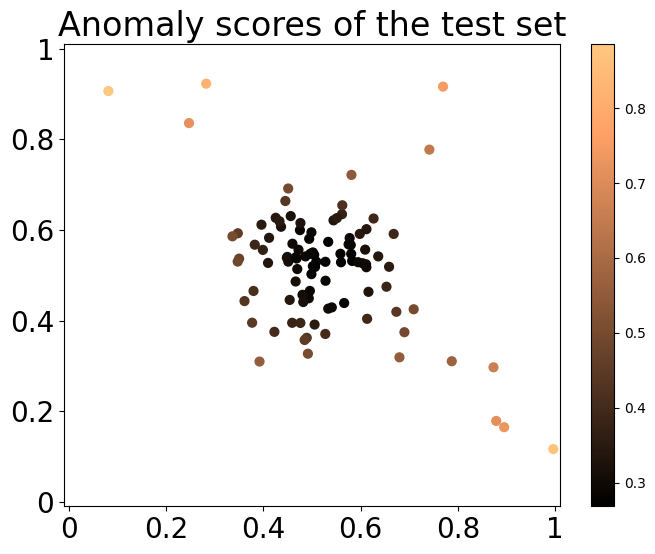

In [6]:
plt.figure(figsize=(8, 6))
plt.title("Anomaly scores of the test set", fontsize= 24)
plt.scatter(X_test[:,0], X_test[:,1], 40, c=test_scores, cmap=plt.cm.copper)
plt.colorbar()
plt.xticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1],fontsize=20)
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1],fontsize=20)
plt.show()

## Compute the AUROC performance of the model

In [7]:
auc = roc_auc_score(Y_test,test_scores)

auc

1.0